In [1]:
import numpy as np
import pandas as pd

from astropy.io import fits
from astropy.table import Table
from astropy.visualization import make_lupton_rgb
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
data_students = pd.read_csv('data_students.csv')
print(len(data_students))
data_students.head()

30


Group  Person       TPR       FPR       PUR       rho  Distance
0      1       1  0.777778  0.321739  0.727273  0.952848  0.322468
1      1       2  0.583333  0.269565  0.714286  0.954702  0.221868
2      1       3  0.638889  0.426087  0.423077  0.931656  0.150474
3      1       4  0.888889  0.373913  0.565217  0.945430  0.364143
4      1       5  0.333333  0.147826  0.222222  0.950993  0.131173

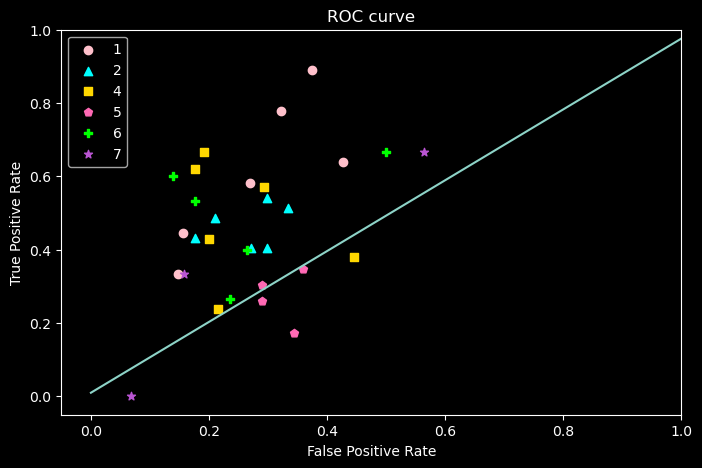

In [3]:
guessing = np.linspace(0, 1 , 100)

plt.figure(figsize=(8,5))
plt.title('ROC curve')
plt.xlim(-0.05, 1)
plt.ylim(-0.05, 1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

color_list = ['Lavender', 'Peach', 'Lilac', 'Lilac', 'Baby Pink', 'Mint Green', 'Sky Blue']
color_list = ['#FFC0CB', '#00FFFF', '#FFD700', '#FFD700', '#FF69B4', '#00FF00', '#BA55D3']
marker_list = ['o', "^", "s", "s", "p", "P", "*", "D"]
for i in range(len(data_students)):
    col_name = color_list[data_students['Group'].iloc[i]-1]
    mar_name = marker_list[data_students['Group'].iloc[i]-1]
    if(data_students['Person'].iloc[i] == 1):
        plt.scatter(data_students['FPR'].iloc[i], data_students['TPR'].iloc[i], marker=mar_name, color=col_name, 
                label=data_students['Group'].iloc[i])
    else:
        plt.scatter(data_students['FPR'].iloc[i], data_students['TPR'].iloc[i], marker=mar_name, color=col_name)
plt.legend() 
plt.plot(guessing, 0.966*guessing+0.01)
plt.show()

22


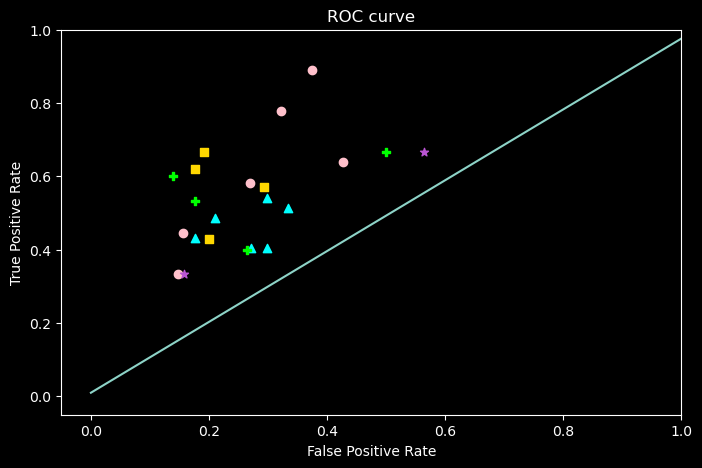

In [4]:
smallest_values = data_students['Distance'].nsmallest(8)
#print(data_students.iloc[smallest_values.index])
data_students = data_students[~data_students['Distance'].isin(smallest_values)]
print(len(data_students))

plt.figure(figsize=(8,5))
plt.title('ROC curve')
plt.xlim(-0.05, 1)
plt.ylim(-0.05, 1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

color_list = ['#FFC0CB', '#00FFFF', '#FFD700', '#FFD700', '#FF69B4', '#00FF00', '#BA55D3']
marker_list = ['o', "^", "s", "s", "p", "P", "*", "D"]
for i in range(len(data_students)):
    col_name = color_list[data_students['Group'].iloc[i]-1]
    mar_name = marker_list[data_students['Group'].iloc[i]-1]
    plt.scatter(data_students['FPR'].iloc[i], data_students['TPR'].iloc[i], marker=mar_name, color=col_name)
    
plt.plot(guessing, 0.966*guessing+0.01)
plt.show()

In [5]:
# For first weighted average

weight_list = []

groups = [1, 2, 4, 6, 7] # removed all data from group 5
for group in groups:
    data_tmp = data_students[data_students['Group'] == group]
    divisor = sum(data_tmp['rho']*data_tmp['TPR']*([1]*len(data_tmp)-data_tmp['FPR']))
    for i in range(len(data_tmp)):
        weight = data_tmp['rho'].iloc[i]*data_tmp['TPR'].iloc[i]*(1 - data_tmp['FPR'].iloc[i])/divisor
        weight_list.append(weight)
    #print(sum(weight_list))

data_students['Weight'] = weight_list
print(min(data_students['Weight']))
print(max(data_students['Weight']))

data_students.to_csv('data_students_weights.csv', index=False)

0.11237216516363867
0.503476484650289


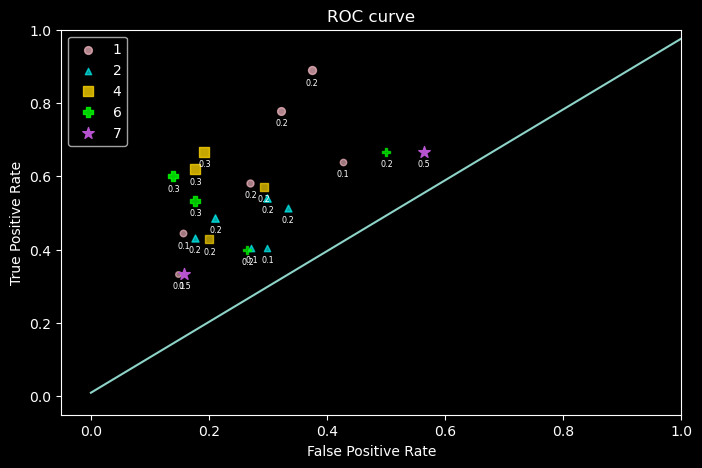

In [6]:
plt.figure(figsize=(8,5))
plt.title('ROC curve')
plt.xlim(-0.05, 1)
plt.ylim(-0.05, 1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

color_list = ['#FFC0CB', '#00FFFF', '#FFD700', '#FFD700', '#FF69B4', '#00FF00', '#BA55D3']
marker_list = ['o', "^", "s", "s", "p", "P", "*", "D"]
for i in range(len(data_students)):
    col_name = color_list[data_students['Group'].iloc[i]-1]
    mar_name = marker_list[data_students['Group'].iloc[i]-1]
    if(data_students['Person'].iloc[i] == 1):
        plt.scatter(data_students['FPR'].iloc[i], data_students['TPR'].iloc[i], marker=mar_name, color=col_name, 
               s = 150*data_students['Weight'].iloc[i], alpha = data_students['Weight'].iloc[i]+0.48, 
                label=data_students['Group'].iloc[i])
    else:
        plt.scatter(data_students['FPR'].iloc[i], data_students['TPR'].iloc[i], marker=mar_name, color=col_name, 
               s = 150*data_students['Weight'].iloc[i], alpha = data_students['Weight'].iloc[i]+0.48)
    plt.text(data_students['FPR'].iloc[i]- 0.01, data_students['TPR'].iloc[i] - 0.04, 
             '{:.1f}'.format(data_students['Weight'].iloc[i]), fontsize = 'xx-small')
plt.legend()   
plt.plot(guessing, 0.966*guessing+0.01)
plt.show()

In [7]:
# For second weighted average
weight_list = []

groups = [1, 2, 4, 6, 7] # removed all data from group 5
for group in groups:
    data_tmp = data_students[data_students['Group'] == group]
    divisor = sum(data_tmp['rho']*data_tmp['TPR']*([1]*len(data_tmp)-data_tmp['FPR'])*data_tmp['Distance'])
    for i in range(len(data_tmp)):
        weight = data_tmp['rho'].iloc[i]*data_tmp['TPR'].iloc[i]*(1 - data_tmp['FPR'].iloc[i])*data_tmp['Distance'].iloc[i]/divisor
        weight_list.append(weight)
    #print(sum(weight_list))

data_students['Weight'] = weight_list
print(min(data_students['Weight']))
print(max(data_students['Weight']))

data_students.to_csv('data_students_weights.csv', index=False)

0.05872724384997299
0.6338639458640247


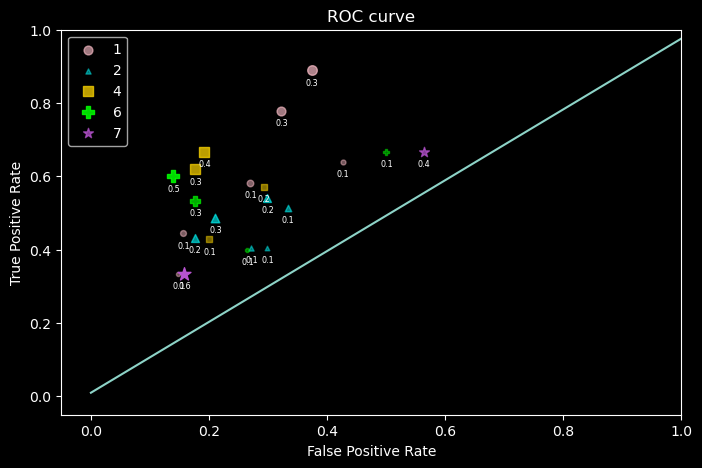

In [8]:
plt.figure(figsize=(8,5))
plt.title('ROC curve')
plt.xlim(-0.05, 1)
plt.ylim(-0.05, 1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

color_list = ['#FFC0CB', '#00FFFF', '#FFD700', '#FFD700', '#FF69B4', '#00FF00', '#BA55D3']
marker_list = ['o', "^", "s", "s", "p", "P", "*", "D"]
for i in range(len(data_students)):
    col_name = color_list[data_students['Group'].iloc[i]-1]
    mar_name = marker_list[data_students['Group'].iloc[i]-1]
    
    if(data_students['Person'].iloc[i] == 1):
        plt.scatter(data_students['FPR'].iloc[i], data_students['TPR'].iloc[i], marker=mar_name, color=col_name, 
               s = 150*data_students['Weight'].iloc[i], alpha = data_students['Weight'].iloc[i]+0.36, 
                label=data_students['Group'].iloc[i])
    else:
        plt.scatter(data_students['FPR'].iloc[i], data_students['TPR'].iloc[i], marker=mar_name, color=col_name, 
               s = 150*data_students['Weight'].iloc[i], alpha = data_students['Weight'].iloc[i]+0.36)
    
    plt.text(data_students['FPR'].iloc[i]- 0.01, data_students['TPR'].iloc[i] - 0.04, 
             '{:.1f}'.format(data_students['Weight'].iloc[i]), fontsize = 'xx-small')
plt.legend()
plt.plot(guessing, 0.966*guessing+0.01)
plt.show()

In [9]:
groups = [1, 2, 4, 6, 7] # removed all data from group 5
columns_per = {'Person A': 1, 'Person B': 2, 'Person C': 3, 'Person D': 4, 'Person E': 5, 'Person F': 6}
for group in groups:
    data_inspection = pd.read_csv('Group' + str(group) + '.csv', sep='\t')
    data_students = pd.read_csv('data_students_weights.csv')
    data_students = data_students[data_students['Group'] == group]
    
    weighted_average = [0]*len(data_inspection)
    for j in range(len(data_students)):
        value = {i for i in columns_per if columns_per[i] == data_students['Person'].iloc[j]}
        to_add = [num * data_students['Weight'].iloc[j] for num in data_inspection[value].values]
        weighted_average = [x + y for x, y in zip(weighted_average, to_add)]
    
    weighted_average = [sublist[0] for sublist in weighted_average]
    data_inspection['Weighted_average'] = weighted_average
    data_inspection.to_csv('Group_' + str(group) + '_complete.csv', index=False)

In [10]:
data_inspection.head()

ID  Person A  Person B  Person C  Jimena  Weird  Weighted_average
0  6000         3         1         1     3.0    0.0          1.732272
1  6001         2         2         2     1.0    0.0          2.000000
2  6002         3         2         1     1.0    0.0          2.366136
3  6003         4         1         4     1.0    0.0          2.098408
4  6004         1         1         1     2.0    0.0          1.000000

In [11]:
fits_path = '/Users/jimenagonzalez/research/DSPL/Searching-double-lenses/vit_cnn_multiclass/results/visual_inspection/fit_files/'
all_data = pd.DataFrame()
all_images = np.zeros((1,3,45,45))

for group in groups:
    hdu_list = fits.open(fits_path + 'group_' + str(group) + '.fits')
    images = hdu_list[1].data 
    data = pd.DataFrame(hdu_list[2].data)
    hdu_list.close()
    
    data_inspection = pd.read_csv('Group_' + str(group) + '_complete.csv')
    merged_df = pd.merge(data, data_inspection, left_on='new_id', right_on='ID', how='left')
    group_list = [group]*len(merged_df)
    merged_df['Group'] = group_list
    
    all_images = np.concatenate((all_images, images))
    all_data = pd.concat([all_data, merged_df])

all_images = np.delete(all_images, 0, axis = 0)
all_data = all_data.reset_index(drop = True)
print(len(all_images), len(all_data))

5000 5000


In [12]:
print(all_data.columns)
all_data.head()

Index(['COADD_OBJECT_ID', 'TILENAME', 'PROB', 'HPIX_16384', 'HPIX_4096',
       'DNF_ZMEAN_SOF', 'RA', 'DEC', 'FLUX_RADIUS_G', 'FLUX_RADIUS_R',
       'FLUX_RADIUS_I', 'FLUX_RADIUS_Z', 'KRON_RADIUS', 'GAP_FLUX_G',
       'MOF_BDF_FLUX_G', 'MOF_PSF_FLUX_G', 'SOF_BDF_FLUX_G', 'SOF_PSF_FLUX_G',
       'MAG_AUTO_G', 'MAG_APER_4_G', 'MAG_APER_8_G', 'SOF_BDF_G_1',
       'SOF_BDF_G_2', 'IMAFLAGS_ISO_G', 'IMAFLAGS_ISO_R', 'IMAFLAGS_ISO_I',
       'IMAFLAGS_ISO_Z', 'EXT_COADD', 'new_id', 'ID', 'Person A', 'Person B',
       'Person C', 'Person D', 'Person E', 'Person F', 'Jimena', 'Weird',
       'Weighted_average', 'Group'],
      dtype='object')


COADD_OBJECT_ID      TILENAME      PROB  HPIX_16384  HPIX_4096  \
0       1041573164  DES0006-4206  0.967073  2326341191  145396324   
1       1206050213  DES0150-3623  0.956465  2310987444  144436715   
2       1031852875  DES0000-0207  0.960928  1140614233   71288389   
3       1031822970  DES0000-3540  0.992511  1075483753   67217734   
4       1033645478  DES0000-0333  0.975207  1139867077   71241692   

   DNF_ZMEAN_SOF         RA        DEC  FLUX_RADIUS_G  FLUX_RADIUS_R  ...  \
0       0.322134   1.657588 -42.220883       8.659569       7.712760  ...   
1       0.467606  27.536753 -36.693940       3.518120       3.348999  ...   
2       0.677300   0.294011  -1.827475       4.539492       3.614511  ...   
3       0.918459   0.624375 -35.732731       6.105855       4.427530  ...   
4       0.091196   0.052319  -3.647114      13.049603      11.395061  ...   

   Person A  Person B  Person C  Person D  Person E  Person F  Jimena  Weird  \
0       2.0       2.0       1.0       1.0       1.0       2.0     1.0    0.0   
1       2.0       1.0       1.0       1.0       1.0       1.0     1.0    0.0   
2       2.0       2.0       2.0       2.0       1.0       1.0     1.0    0.0   
3       3.0       2.0       3.0       3.0       1.0       1.0     2.0    0.0   
4       2.0       1.0       1.0       1.0       1.0       2.0     1.0    0.0   

   Weighted_average  Group  
0          1.538545      1  
1          1.268641      1  
2          1.820947      1  
3          2.492315      1  
4          1.388967      1  

[5 rows x 40 columns]

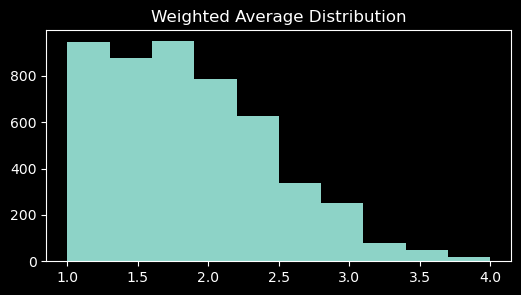

In [13]:
plt.figure(figsize=(6,3))
plt.title('Weighted Average Distribution')
plt.hist(all_data['Weighted_average'], range=(1,4))
plt.show()

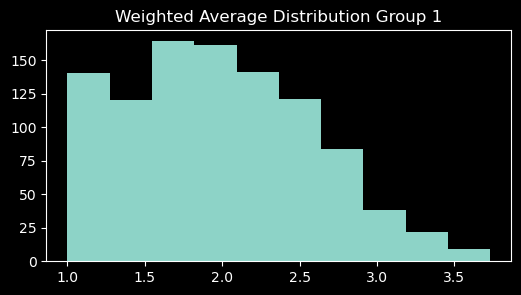

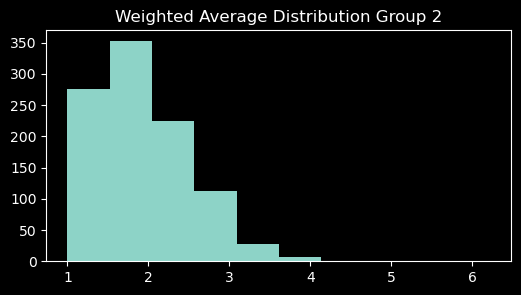

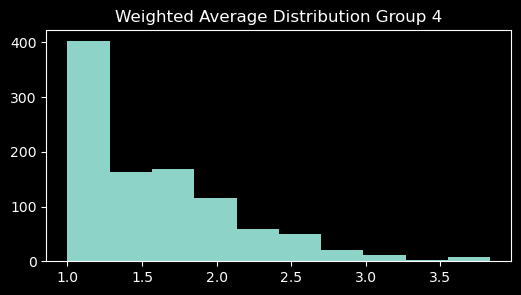

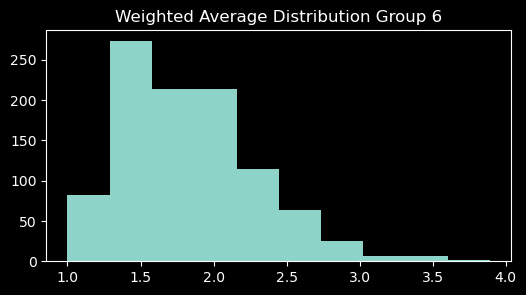

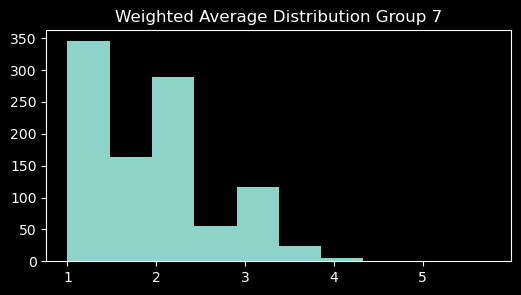

In [14]:
#Distribution of the weighted average for different groups
for group in groups:
    data_tmp = all_data[all_data['Group'] == group]
    plt.figure(figsize=(6,3))
    plt.title('Weighted Average Distribution Group ' + str(group))
    plt.hist(data_tmp['Weighted_average'])#, range=(1,4))
    plt.show()

In [15]:
def make_plot_all(objects, data):
    #print(title)
    for i in range(len(objects)):
        if(i%8 == 0):
            plt.figure(figsize=(16,9))
            for j in range(8):
                if(i+j > len(objects)-1): break
                #if(data['Weighted_average'].iloc[i+j] >= 4): continue
                plt.subplot(1,8,j+1)
                #print(data['COADD_OBJECT_ID'].iloc[i+j])
                new_title = 'Aver.: {:.2f}'.format(data['Weighted_average'].iloc[i+j])
                plt.title(new_title, fontsize = 15)
                rgb = make_lupton_rgb(objects[i+j][2], objects[i+j][1], objects[i+j][0], Q=11., stretch=40.)
                plt.imshow(rgb, aspect='equal')
                plt.xticks([], [])
                plt.yticks([], []) 
            plt.savefig('Candidates_' + str(i+j) + '.png', bbox_inches='tight')
            plt.show()

Group: 1


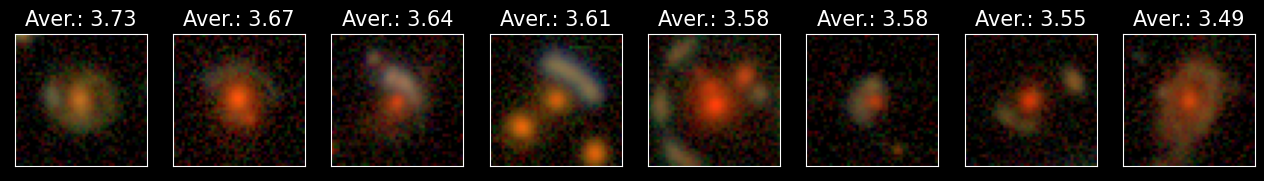

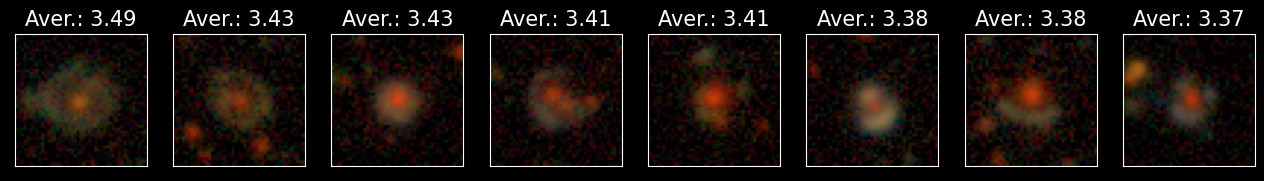

Group: 2


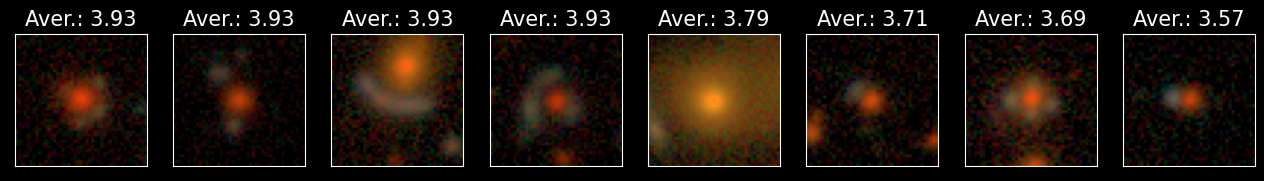

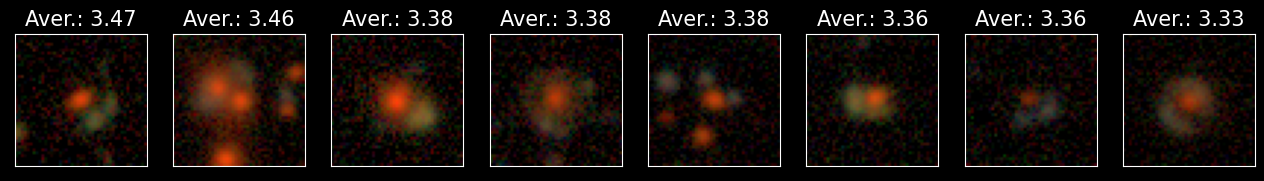

Group: 4


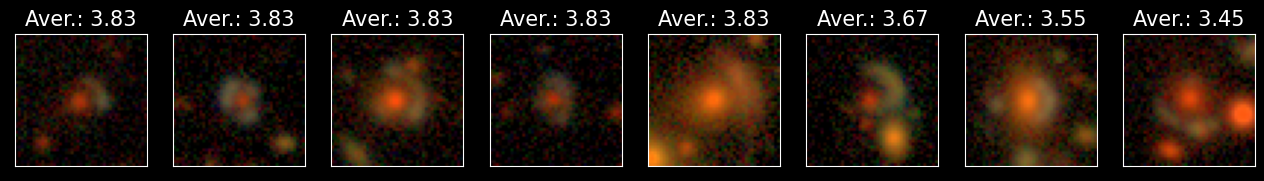

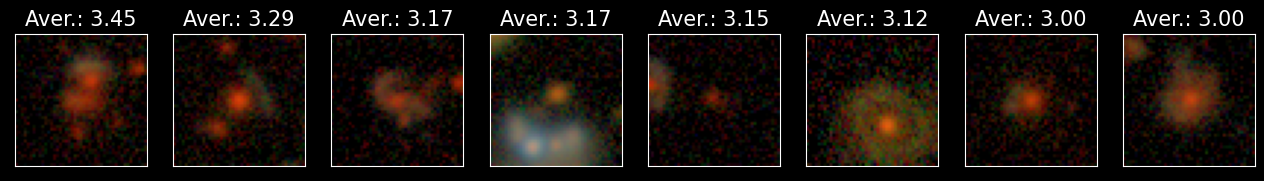

Group: 6


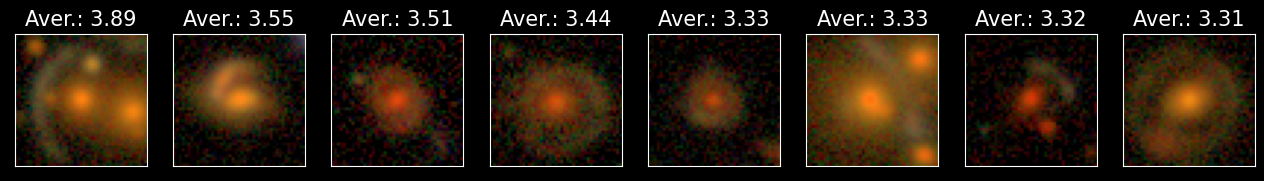

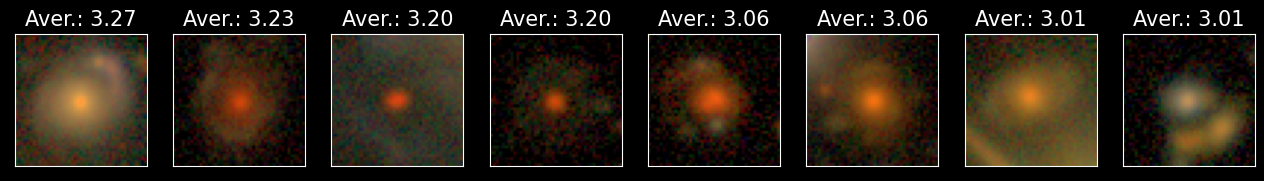

Group: 7


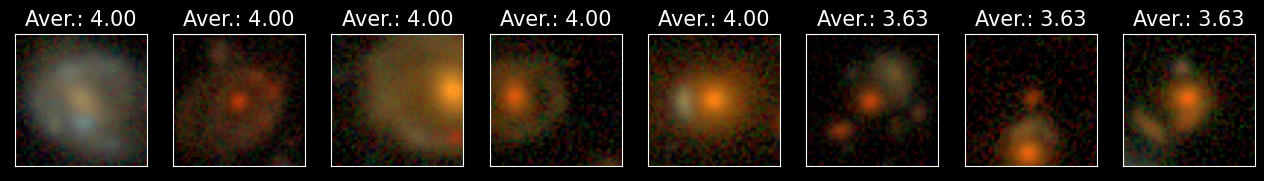

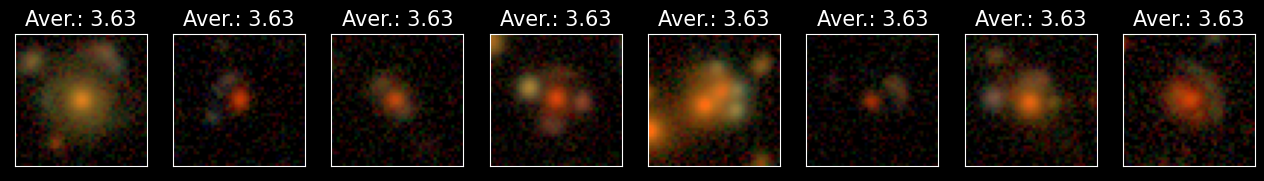

In [16]:
N = 16  # Number of candidates selected from each group
groups = [1, 2, 4, 6, 7]
for group in groups:
    print('Group: ' + str(group))
    data_tmp =  all_data[all_data['Group'] == group]
    sorted_df = data_tmp.sort_values('Weighted_average', ascending=False)
    sorted_df = sorted_df[sorted_df['Weighted_average'] <= 4]
    selected_rows = sorted_df.head(N)
    images_tmp = all_images[selected_rows.index].copy()
    make_plot_all(images_tmp, selected_rows)

In [17]:
# Writes fit file
def write_fit_file(name, x, data):
    my_types = {'COADD_OBJECT_ID': int, 'TILENAME': str, 'PROB': float, 'HPIX_16384': int, 'HPIX_4096': int,
       'DNF_ZMEAN_SOF': float, 'RA': float, 'DEC': float, 'FLUX_RADIUS_G': float, 'FLUX_RADIUS_R': float,
       'FLUX_RADIUS_I': float, 'FLUX_RADIUS_Z': float, 'KRON_RADIUS': float, 'GAP_FLUX_G': float,
       'MOF_BDF_FLUX_G': float, 'MOF_PSF_FLUX_G': float, 'SOF_BDF_FLUX_G': float, 'SOF_PSF_FLUX_G': float,
       'MAG_AUTO_G': float, 'MAG_APER_4_G': float, 'MAG_APER_8_G': float, 'SOF_BDF_G_1': float,
       'SOF_BDF_G_2': float, 'IMAFLAGS_ISO_G': int, 'IMAFLAGS_ISO_R': int, 'IMAFLAGS_ISO_I': int,
       'IMAFLAGS_ISO_Z': int, 'EXT_COADD': int, 'new_id': int, 'ID': int, 'Person A': float, 'Person B': float,
       'Person C': float, 'Person D': float, 'Person E': float, 'Person F': float, 'Jimena': float, 'Weird': float,
       'Weighted_average': float, 'Group': int}
    data = data.astype(my_types)
    
    primary = fits.PrimaryHDU()
    image = fits.ImageHDU(x, name="IMAGE")
    table_data = Table.from_pandas(data)
    table = fits.BinTableHDU(data = table_data)
    hdu_list = fits.HDUList([primary, image, table])
    hdu_list.writeto(name + '.fits', overwrite=True)   
    hdu_list.close()

In [18]:
# Saving best candidates to test modeling pipeline
images_sav = np.zeros((1,3,45,45))
data_sav = pd.DataFrame()
    
N = 24  # Number of candidates selected from each group
groups = [1, 2, 4]
for group in groups:
    print('Group: ' + str(group))
    data_tmp =  all_data[all_data['Group'] == group]
    sorted_df = data_tmp.sort_values('Weighted_average', ascending=False)
    sorted_df = sorted_df[sorted_df['Weighted_average'] <= 4]
    selected_rows = sorted_df.head(N)
    images_tmp = all_images[selected_rows.index].copy()
    
    images_sav = np.append(images_sav, images_tmp, axis = 0)
    data_sav = data_sav.append(selected_rows, ignore_index=True)
    #make_plot_all(images_tmp, selected_rows)
    
images_sav = np.delete(images_sav, 0, axis = 0)
print(images_sav.shape, data_sav.shape)
write_fit_file('highest_ranked_cand', images_sav, data_sav)

Group: 1
Group: 2
Group: 4
(72, 3, 45, 45) (72, 40)


In [19]:
# For slides
def make_plot_all(objects, data, title):
    #print(title)
    for i in range(len(objects)):
        if(i%12 == 0):
            plt.figure(figsize=(19,5))
            for j in range(12):
                if(i+j > len(objects)-1): break
                #if(data['Weighted_average'].iloc[i+j] >= 4): continue
                plt.subplot(1,12,j+1)
                #print(data['COADD_OBJECT_ID'].iloc[i+j])
                new_title = 'Aver.: {:.2f}'.format(data['Weighted_average'].iloc[i+j])
                plt.title(new_title, fontsize = 15)
                rgb = make_lupton_rgb(objects[i+j][2], objects[i+j][1], objects[i+j][0], Q=11., stretch=40.)
                plt.imshow(rgb, aspect='equal')
                plt.xticks([], [])
                plt.yticks([], []) 
            plt.savefig('Images/' + title + str(i) + '.png', bbox_inches='tight')
            plt.show()

Group: 1


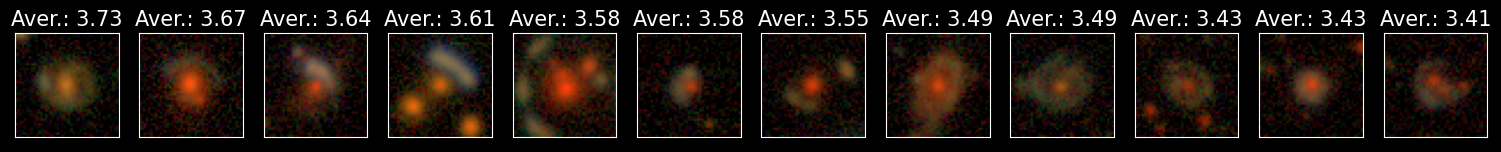

Group: 2


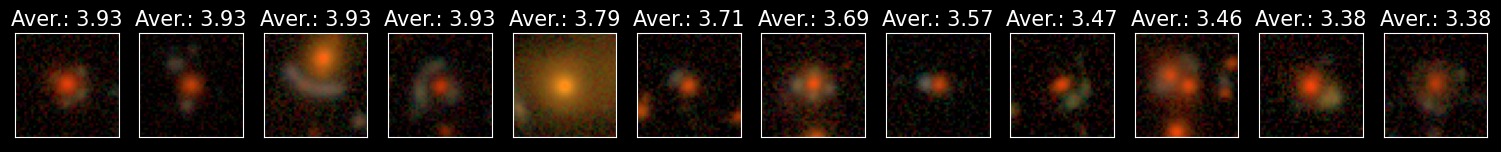

Group: 4


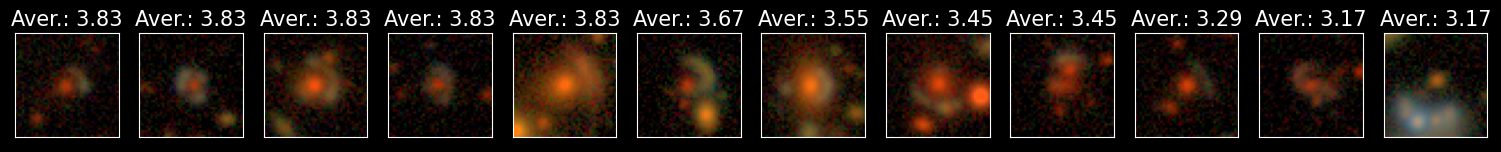

Group: 6


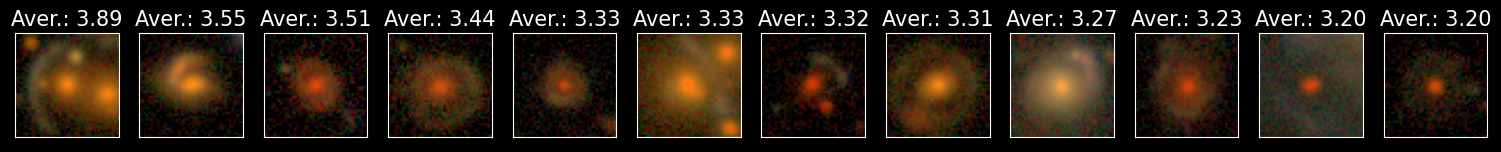

Group: 7


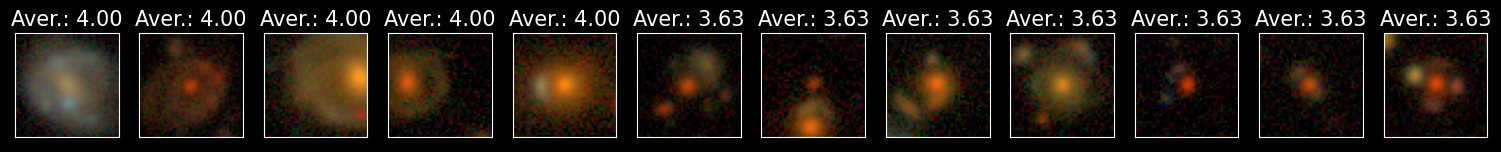

In [20]:
N = 12  # Number of candidates selected from each group
groups = [1, 2, 4, 6, 7]
for group in groups:
    print('Group: ' + str(group))
    data_tmp =  all_data[all_data['Group'] == group]
    sorted_df = data_tmp.sort_values('Weighted_average', ascending=False)
    sorted_df = sorted_df[sorted_df['Weighted_average'] <= 4]
    selected_rows = sorted_df.head(N)
    images_tmp = all_images[selected_rows.index].copy()
    title = 'Group' + str(group) + '_' 
    make_plot_all(images_tmp, selected_rows, title)